In this Analysis Report, the two albums I chose were Planet Her by Doja Cat and Gettin Old by Luke Combs. I decided to chose these two albums due to them being my favorite albums. Also, both albums are a different genre of music, which captured my interest while looking for albums to analyze. 

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import requests 
import base64
import urllib 

The first 10-15 lines of code include information needed to access spotify API. Much of this information was also used in my spotify API assignment. 

In [15]:
Client_ID = pd.read_csv('spotify_keys_9.19.txt')['Client_ID'].iloc[0]

In [16]:
Client_Secret = pd.read_csv('spotify_keys_9.19.txt')['Client_Secret'].iloc[0]

In [17]:
#Client_ID

In [18]:
#Client_Secret

In [19]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [20]:
#client_cred

In [21]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [22]:
#headers

In [23]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [24]:
response = requests.post(url = url, data = payload, headers = headers )

In [25]:
response.status_code

200

In [26]:
#response.json()['access_token']

In [27]:
header_key = response.json()

In [28]:
#header_key['access_token']

In [29]:
key = header_key['access_token']

In [30]:
session_headers = {"Authorization": "Bearer {}".format(key)}

In [31]:
#session_headers

### Artist 1: Doja Cat
#### Album: Planet Her 

In [32]:
doja_cat_id = '1nAQbHeOWTfQzbOoFrvndW'

In [33]:
doja_tracks_url  = 'https://api.spotify.com/v1/albums/{}/tracks'.format(doja_cat_id)

In [34]:
doja_tracks_url

'https://api.spotify.com/v1/albums/1nAQbHeOWTfQzbOoFrvndW/tracks'

In [35]:
doja_tracks_response = requests.get(url = doja_tracks_url, headers = session_headers)

In [36]:
doja_tracks_response.status_code

200

In [37]:
doja_tracks_data = doja_tracks_response.json()

In [38]:
doja_tracks_data.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [39]:
type(doja_tracks_data['items'])

list

In [40]:
doja_tracks_data['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [41]:
doja_tracks_data['items'][0]['name']

'Woman'

In [42]:
[x['name'] for x in doja_tracks_data['items']]

['Woman',
 'Naked',
 'Payday (feat. Young Thug)',
 'Get Into It (Yuh)',
 'Need to Know',
 "I Don't Do Drugs (feat. Ariana Grande)",
 'Love To Dream',
 'You Right',
 'Been Like This',
 'Options (feat. JID)',
 "Ain't Shit",
 'Imagine',
 'Alone',
 'Kiss Me More (feat. SZA)']

Dataframe for tracks in Doja Cats album, Planet Her. 

In [43]:
doja_tracks_df = pd.DataFrame(doja_tracks_data['items'])

In [44]:
doja_tracks_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,172626,True,{'spotify': 'https://open.spotify.com/track/6U...,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,6Uj1ctrBOjOas8xZXGqKk4,False,Woman,https://p.scdn.co/mp3-preview/2ae0b61e45d9a5d6...,1,track,spotify:track:6Uj1ctrBOjOas8xZXGqKk4
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,223560,True,{'spotify': 'https://open.spotify.com/track/0C...,https://api.spotify.com/v1/tracks/0CsR9Y9SnC6Z...,0CsR9Y9SnC6ZWmekmVqSHz,False,Naked,https://p.scdn.co/mp3-preview/ad5c7c6914163d4f...,2,track,spotify:track:0CsR9Y9SnC6ZWmekmVqSHz
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,212946,True,{'spotify': 'https://open.spotify.com/track/2H...,https://api.spotify.com/v1/tracks/2HolBGR6tpiW...,2HolBGR6tpiWI80MXoV1dJ,False,Payday (feat. Young Thug),https://p.scdn.co/mp3-preview/5c96a4bdf1e22577...,3,track,spotify:track:2HolBGR6tpiWI80MXoV1dJ
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,138293,True,{'spotify': 'https://open.spotify.com/track/0W...,https://api.spotify.com/v1/tracks/0W6I02J9xcqK...,0W6I02J9xcqK8MtSeosEXb,False,Get Into It (Yuh),https://p.scdn.co/mp3-preview/7d4974829ad00a6a...,4,track,spotify:track:0W6I02J9xcqK8MtSeosEXb
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,210560,True,{'spotify': 'https://open.spotify.com/track/3V...,https://api.spotify.com/v1/tracks/3Vi5XqYrmQgO...,3Vi5XqYrmQgOYBajMWSvCi,False,Need to Know,https://p.scdn.co/mp3-preview/153dc4a72a260497...,5,track,spotify:track:3Vi5XqYrmQgOYBajMWSvCi


The line of code below shows how to obtain track ID's to be able to access audio features for Planet Her.

In [45]:
urllib.parse.quote(','.join(list(doja_tracks_df['id'])))

'6Uj1ctrBOjOas8xZXGqKk4%2C0CsR9Y9SnC6ZWmekmVqSHz%2C2HolBGR6tpiWI80MXoV1dJ%2C0W6I02J9xcqK8MtSeosEXb%2C3Vi5XqYrmQgOYBajMWSvCi%2C0FFsgUoFibYISzMxuGS61W%2C6Q9IUoBTNLHgBib1FSFGbj%2C0k4d5YPDr1r7FX77VdqWez%2C7y3xU9vEC1s8DSuuoSYKih%2C1ayV64ur8VWgc6OPtPRl1q%2C5lAnYvAIkSDNXqfo7DyFUm%2C5CC5krEgwJXuoA0F9scOFg%2C45Nc6nYgV3yBvAeRaZt689%2C3DarAbFujv6eYNliUTyqtz'

In [46]:
doja_audio_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(urllib.parse.quote(','.join(list(doja_tracks_df['id']))))

In [47]:
doja_features_response = requests.get(url = doja_audio_features_url, headers = session_headers)

In [48]:
doja_features = doja_features_response.json()

Below is the DataFrame for Planet Her audio features.

In [49]:
doja_features_df = pd.DataFrame(doja_features['audio_features'])

In [50]:
doja_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.824,0.764,5,-4.175,0,0.0854,0.0888,0.002940,0.1170,0.881,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4
1,0.733,0.862,7,-5.736,1,0.1970,0.3740,0.002470,0.1310,0.536,111.076,audio_features,0CsR9Y9SnC6ZWmekmVqSHz,spotify:track:0CsR9Y9SnC6ZWmekmVqSHz,https://api.spotify.com/v1/tracks/0CsR9Y9SnC6Z...,https://api.spotify.com/v1/audio-analysis/0CsR...,223560,4
2,0.619,0.707,1,-5.791,1,0.0499,0.0366,0.000075,0.1300,0.558,168.995,audio_features,2HolBGR6tpiWI80MXoV1dJ,spotify:track:2HolBGR6tpiWI80MXoV1dJ,https://api.spotify.com/v1/tracks/2HolBGR6tpiW...,https://api.spotify.com/v1/audio-analysis/2Hol...,212947,4
3,0.912,0.655,8,-6.029,0,0.1620,0.3150,0.000034,0.0894,0.793,91.942,audio_features,0W6I02J9xcqK8MtSeosEXb,spotify:track:0W6I02J9xcqK8MtSeosEXb,https://api.spotify.com/v1/tracks/0W6I02J9xcqK...,https://api.spotify.com/v1/audio-analysis/0W6I...,138293,4
4,0.664,0.609,1,-6.509,1,0.0707,0.3040,0.000000,0.0926,0.194,130.041,audio_features,3Vi5XqYrmQgOYBajMWSvCi,spotify:track:3Vi5XqYrmQgOYBajMWSvCi,https://api.spotify.com/v1/tracks/3Vi5XqYrmQgO...,https://api.spotify.com/v1/audio-analysis/3Vi5...,210560,4


In [51]:
doja_features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

### Artist 2: Luke Combs 
#### Album 2: Gettin Old

In [52]:
luke_combs_id = '5Uly85dJHHDfHQCsyUQ8gw'

In [53]:
luke_tracks_url  = 'https://api.spotify.com/v1/albums/{}/tracks'.format(luke_combs_id)

In [54]:
luke_tracks_url

'https://api.spotify.com/v1/albums/5Uly85dJHHDfHQCsyUQ8gw/tracks'

In [55]:
luke_tracks_response = requests.get(url = luke_tracks_url, headers = session_headers)

In [56]:
luke_tracks_response.status_code

200

In [57]:
luke_tracks_data = luke_tracks_response.json()

In [58]:
luke_tracks_data.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [59]:
type(luke_tracks_data['items'])

list

In [60]:
luke_tracks_data['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [61]:
luke_tracks_data['items'][0]['name']

"Growin' Up and Gettin' Old"

In [62]:
[x['name'] for x in luke_tracks_data['items']]

["Growin' Up and Gettin' Old",
 'Hannah Ford Road',
 'Back 40 Back',
 'You Found Yours',
 'The Beer, the Band, and the Barstool',
 'Still',
 'See Me Now',
 'Joe',
 'A Song Was Born',
 'My Song Will Never Die',
 'Where the Wild Things Are',
 'Love You Anyway',
 'Take You With Me',
 'Fast Car',
 'Tattoo on a Sunburn',
 '5 Leaf Clover',
 'Fox in the Henhouse',
 'The Part']

Below is the data frame for tracks in Gettin Old. 

In [63]:
luke_tracks_df = pd.DataFrame(luke_tracks_data['items'])

In [64]:
luke_tracks_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,233666,False,{'spotify': 'https://open.spotify.com/track/24...,https://api.spotify.com/v1/tracks/24Z0qiHUR9cT...,24Z0qiHUR9cTB4UfGUqCnj,False,Growin' Up and Gettin' Old,https://p.scdn.co/mp3-preview/476a4a4d0bda8d0b...,1,track,spotify:track:24Z0qiHUR9cTB4UfGUqCnj
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,218173,False,{'spotify': 'https://open.spotify.com/track/5g...,https://api.spotify.com/v1/tracks/5gy5oMthJa80...,5gy5oMthJa807ihJik4U3O,False,Hannah Ford Road,https://p.scdn.co/mp3-preview/c5b5b41ce7fbead8...,2,track,spotify:track:5gy5oMthJa807ihJik4U3O
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,185466,False,{'spotify': 'https://open.spotify.com/track/5i...,https://api.spotify.com/v1/tracks/5inIeRExNFzO...,5inIeRExNFzOuqaYU7tpT9,False,Back 40 Back,https://p.scdn.co/mp3-preview/509588bfb948a60b...,3,track,spotify:track:5inIeRExNFzOuqaYU7tpT9
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,191986,False,{'spotify': 'https://open.spotify.com/track/5O...,https://api.spotify.com/v1/tracks/5OGCd9NL8Xcw...,5OGCd9NL8XcwpkTmSxL5YI,False,You Found Yours,https://p.scdn.co/mp3-preview/c3fb0f485bd39131...,4,track,spotify:track:5OGCd9NL8XcwpkTmSxL5YI
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,217640,False,{'spotify': 'https://open.spotify.com/track/4x...,https://api.spotify.com/v1/tracks/4xXLSKNYTHLN...,4xXLSKNYTHLN00eZEzbqLr,False,"The Beer, the Band, and the Barstool",https://p.scdn.co/mp3-preview/2165ae33277fa357...,5,track,spotify:track:4xXLSKNYTHLN00eZEzbqLr


The line of code below shows how to obtain track ID's to be able to access audio features for Planet Her.

In [65]:
urllib.parse.quote(','.join(list(luke_tracks_df['id'])))

'24Z0qiHUR9cTB4UfGUqCnj%2C5gy5oMthJa807ihJik4U3O%2C5inIeRExNFzOuqaYU7tpT9%2C5OGCd9NL8XcwpkTmSxL5YI%2C4xXLSKNYTHLN00eZEzbqLr%2C6LuooOeUu4NOjkVOiT5CdS%2C5WxQEQJtrOYzobMBTsdPBb%2C0kPhTGl84wcSzdTareTroP%2C4AhZSJyGTfYqUnFjn5eGQa%2C2bPOr33Dh8usjH01h1wa3N%2C0eBFgRxyVSeuT4iyrbukdn%2C2kYevr8cbIAH2ha8210Bnz%2C4tgKstWpyU8mtWVQp7ojbM%2C1Lo0QY9cvc8sUB2vnIOxDT%2C0V75hy6x3cToema5BdJaj9%2C52ChYmfu792MW2Ezv0whpk%2C3GZSVedXaTqScGsewGuAyi%2C3v8e2n4bFrAeKRKgy3nha1'

In [66]:
luke_audio_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(urllib.parse.quote(','.join(list(luke_tracks_df['id']))))

In [67]:
luke_features_response = requests.get(url = luke_audio_features_url, headers = session_headers)

In [68]:
luke_features = luke_features_response.json()

In [69]:
luke_features_df = pd.DataFrame(luke_features['audio_features'])

In [70]:
luke_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.511,0.600,2,-5.699,1,0.0268,0.160000,0.000005,0.114,0.269,146.051,audio_features,24Z0qiHUR9cTB4UfGUqCnj,spotify:track:24Z0qiHUR9cTB4UfGUqCnj,https://api.spotify.com/v1/tracks/24Z0qiHUR9cT...,https://api.spotify.com/v1/audio-analysis/24Z0...,233667,4
1,0.520,0.962,1,-5.506,0,0.0827,0.000369,0.000000,0.330,0.488,131.068,audio_features,5gy5oMthJa807ihJik4U3O,spotify:track:5gy5oMthJa807ihJik4U3O,https://api.spotify.com/v1/tracks/5gy5oMthJa80...,https://api.spotify.com/v1/audio-analysis/5gy5...,218173,4
2,0.560,0.589,11,-6.849,1,0.0308,0.566000,0.000000,0.124,0.394,82.026,audio_features,5inIeRExNFzOuqaYU7tpT9,spotify:track:5inIeRExNFzOuqaYU7tpT9,https://api.spotify.com/v1/tracks/5inIeRExNFzO...,https://api.spotify.com/v1/audio-analysis/5inI...,185467,4
3,0.586,0.725,10,-7.073,1,0.0254,0.005320,0.001730,0.228,0.680,94.995,audio_features,5OGCd9NL8XcwpkTmSxL5YI,spotify:track:5OGCd9NL8XcwpkTmSxL5YI,https://api.spotify.com/v1/tracks/5OGCd9NL8Xcw...,https://api.spotify.com/v1/audio-analysis/5OGC...,191987,4
4,0.519,0.682,8,-6.284,1,0.0321,0.161000,0.000026,0.113,0.451,78.933,audio_features,4xXLSKNYTHLN00eZEzbqLr,spotify:track:4xXLSKNYTHLN00eZEzbqLr,https://api.spotify.com/v1/tracks/4xXLSKNYTHLN...,https://api.spotify.com/v1/audio-analysis/4xXL...,217640,4


In [71]:
luke_features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

Danceability and Valence are the two audio features I selected for this report. I chose these two variables because they are the most interesting variables to me. I also thought the comparison of the features in each album would be interesting. 

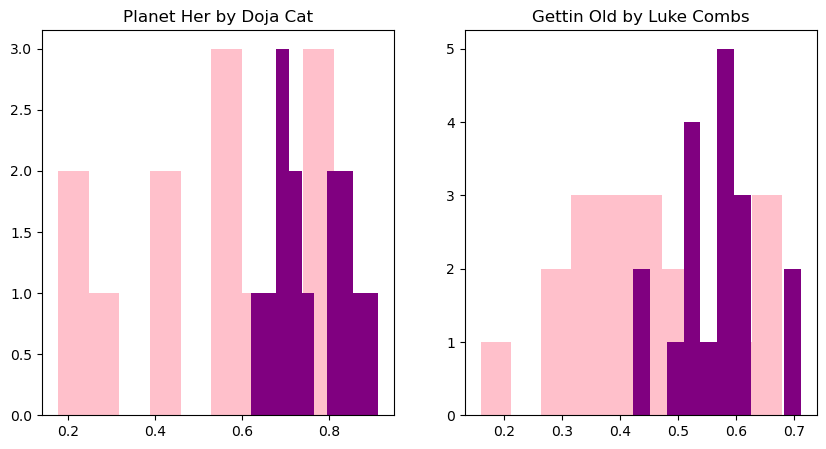

In [72]:
fig1, ax1 = plt.subplots(1, 2, figsize = (10, 5))
ax1[0].hist(doja_features_df['valence'], color = 'pink')
ax1[0].hist(doja_features_df['danceability'], color = 'purple') 
ax1[1].hist(luke_features_df['valence'], color = 'pink') 
ax1[1].hist(luke_features_df['danceability'], color = 'purple') 

ax1[0].set_title('Planet Her by Doja Cat')
ax1[1].set_title('Gettin Old by Luke Combs')


plt.show()

I had trouble with this part of the assignment. I was not sure how to correctly place the histograms as well as adding both variables to each graph. I spent the most time on this part of the assignment, I am not sure if this is correct. 


### In Histogram 1, Planet Her, the valence level overall has higher values than the danceability level. 

### In Histogram 2, Gettin Old, the danceability level is higher than the valence level. 


I also got confused on the axis labeling for this part and how it representented the features. 

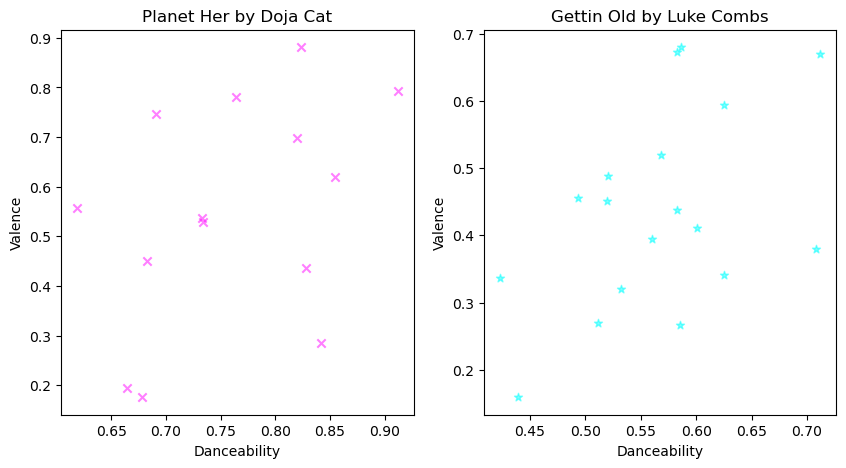

In [73]:
fig3, ax3 = plt.subplots(1, 2, figsize = (10, 5))
ax3[0].scatter (x = doja_features_df['danceability'],
            y = doja_features_df['valence'], 
                label = 'Planet Her',
          color = 'magenta',
            marker = 'x',
           alpha = .5)
ax3[1].scatter(x = luke_features_df['danceability'],
            y = luke_features_df['valence'],
               label = 'Gettin Old',
           color = 'aqua',
                marker = '*',
           alpha = .5)
ax3[0].set_xlabel('Danceability')
ax3[0].set_ylabel('Valence')
ax3[1].set_xlabel('Danceability')
ax3[1].set_ylabel('Valence')
ax3[0].set_title('Planet Her by Doja Cat')
ax3[1].set_title('Gettin Old by Luke Combs')

plt.show()

Scatterplot 1, Planet Her, shows danceability on the x axis and valence on the y axis. To make the graph easier to read, I used the marker feature to change the shape of the points, changed the color, and used labels all to make my easier to read.  In these graphs, both features in each album look similar in value, but Planet her has higher values of both danceability and valence over Gettin Old.

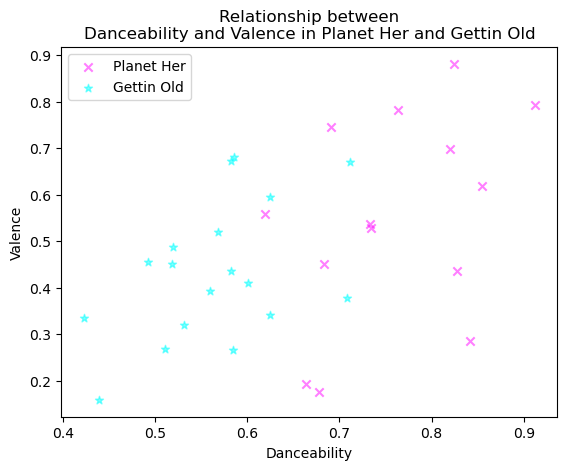

In [74]:
fig4, ax4 = plt.subplots()
ax4.scatter (x = doja_features_df['danceability'],
            y = doja_features_df['valence'],
            label = 'Planet Her',
           color = 'magenta',
            marker = 'x',
           alpha = .5)
ax4.scatter(x = luke_features_df['danceability'],
            y = luke_features_df['valence'],
               label = 'Gettin Old',
           color = 'aqua',
                marker = '*',
           alpha = .5)
ax4.set_xlabel('Danceability')
ax4.set_ylabel('Valence')
ax4.set_xlabel('Danceability')
ax4.set_ylabel('Valence')
ax4.set_title('Planet Her by Doja Cat')
ax4.set_title('Gettin Old by Luke Combs')

ax4.set_title('Relationship between\nDanceability and Valence in Planet Her and Gettin Old')
ax4.legend()

plt.show()

In the scatterplot above, it is showing danceability and valence for both albums. To make this graph easier to read, I changed the color and shape of the points, added axis labels and a title, as well as a legend. This graph shows that Gettin' Old has lower danceability and low valence. Planet Her has higher danceability and higher valence. 

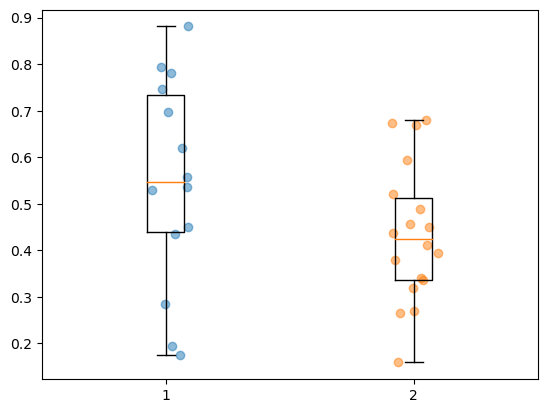

In [75]:
ph_valence = doja_features_df['valence']
go_valence = luke_features_df['valence']
ph_xs = [1] * len(ph_valence)
go_xs = [2] * len(go_valence)
ph_x_jitter = np.random.uniform(-0.10, .10, len(ph_xs))
go_x_jitter = np.random.uniform(-.10, .10, len(go_xs))

fig5, ax5 = plt.subplots()
ax5.boxplot(ph_valence, positions = [1])
ax5.boxplot(go_valence, positions = [2])
ax5.scatter(ph_xs + ph_x_jitter, ph_valence, alpha = .5)
ax5.scatter(go_xs + go_x_jitter, go_valence, alpha = .5)


plt.show()

The box-scatter plots show valence for Planet Her and Gettin Old. The box-scatter plot show that planet her has higher valence values than Gettin Old. Having a higher valence means the level of happiness is higher. The points within plot 1 have a pretty big wide range of values. There are only about three songs that have a low valence, but the rest are pretty high.

In [76]:
valence_ttest = stats.ttest_ind(ph_valence, go_valence)

In [77]:
valence_ttest.statistic

1.7145739421191222

In [78]:
round(valence_ttest.pvalue, 5)

0.09674

The test results show that the comparison between this data is not significant. The p-value is higher than .05 which is the commonly used significance model. Therefore, there is not enough evidence to show a signifcant difference in between the valence and danceability in Planet Her and Gettin Old.